# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [1]:
from core import crossval_table, get_color_fader
from Gaugi import mkdir_p

from copy import copy
from pprint import pprint
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt

import atlas_mpl_style as ampl
ampl.use_atlas_style()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence

Applying ATLAS style settings...

Applying ATLAS style settings...
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...


In [2]:
mkdir_p('output/crossval')

In [3]:
def create_op_dict(op, decoration='reference'):
    
    d = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              
              # op
              'pd_ref'    : decoration+"/"+op+"/pd_ref#0",
              'fa_ref'    : decoration+"/"+op+"/fa_ref#0",
              'sp_ref'    : decoration+"/"+op+"/sp_ref",
              'pd_val'    : decoration+"/"+op+"/pd_val#0",
              'fa_val'    : decoration+"/"+op+"/fa_val#0",
              'sp_val'    : decoration+"/"+op+"/sp_val",
              'pd_op'     : decoration+"/"+op+"/pd_op#0",
              'fa_op'     : decoration+"/"+op+"/fa_op#0",
              'sp_op'     : decoration+"/"+op+"/sp_op",

              # Counts
              'pd_ref_passed'    : decoration+"/"+op+"/pd_ref#1",
              'fa_ref_passed'    : decoration+"/"+op+"/fa_ref#1",
              'pd_ref_total'     : decoration+"/"+op+"/pd_ref#2",
              'fa_ref_total'     : decoration+"/"+op+"/fa_ref#2",
              'pd_val_passed'    : decoration+"/"+op+"/pd_val#1",
              'fa_val_passed'    : decoration+"/"+op+"/fa_val#1",
              'pd_val_total'     : decoration+"/"+op+"/pd_val#2",
              'fa_val_total'     : decoration+"/"+op+"/fa_val#2",
              'pd_op_passed'     : decoration+"/"+op+"/pd_op#1",
              'fa_op_passed'     : decoration+"/"+op+"/fa_op#1",
              'pd_op_total'      : decoration+"/"+op+"/pd_op#2",
              'fa_op_total'      : decoration+"/"+op+"/fa_op#2",
    })
    return d


op_names = ['tight', 'medium', 'loose', 'vloose']

tuned_info = collections.OrderedDict({})
for op in op_names:
    tuned_info[op] = create_op_dict(op, "reference")

In [4]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [5]:
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v12  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [6]:
cv_v8.from_csv('v8/output/crossval/table_v8.csv')
cv_v12.from_csv('v12/output/crossval/table_v12.csv')

In [7]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')

In [8]:
best_inits_v12 = cv_v12.filter_inits("max_sp_val")
best_inits_v12 = best_inits_v12.loc[best_inits_v12.model_idx==3]
best_sorts_v12 = cv_v12.filter_sorts( best_inits_v12, 'max_sp_op')

In [9]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v12,
                       ])
                       
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v12,
                       ])

### 1.2) Make the table:

In [10]:
for op in op_names:
    cv_v8.dump_beamer_table( best_inits.loc[best_inits.op_name == op] ,  
                            'tuning_v8_and_v12_'+op+'_25bins', 
                             title = op+' Tunings (v8 and v12)', 
                             tags = ['v8','v12']
                           )

2022-03-24 00:49:04,190 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_and_v12_tight_25bins.pdf latex code...
2022-03-24 00:49:05,535 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_and_v12_medium_25bins.pdf latex code...
2022-03-24 00:49:06,744 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_and_v12_loose_25bins.pdf latex code...
2022-03-24 00:49:07,976 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_and_v12_vloose_25bins.pdf latex code...


In [11]:
!mv *.tex output/crossval
!mv *.pdf output/crossval

In [13]:
lines = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid']
markers = ['o','v','^','>', '<', 's','*', '+','x']

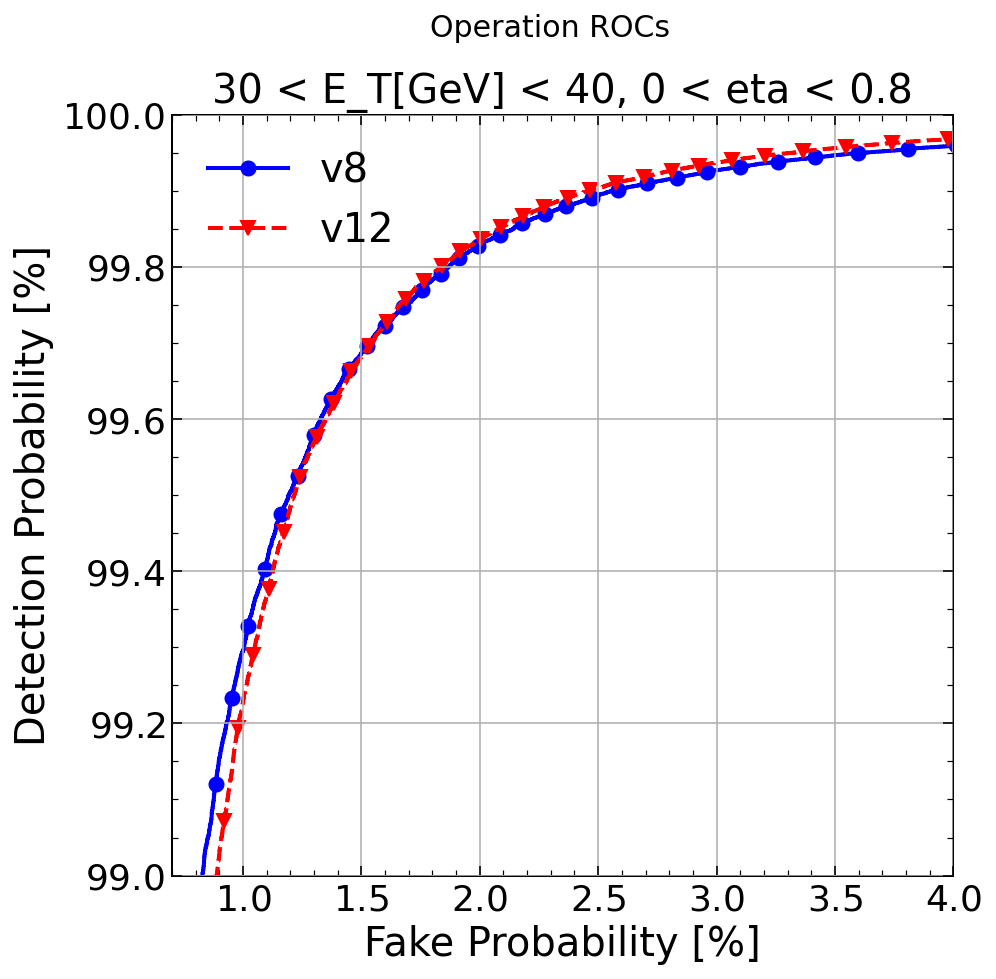

In [17]:
cv_v8.plot_roc_curves( best_sorts, ['v8','v12'], 
                        ['v8', 'v12'], 
                        'output/roc_v8_and_v12_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',2),
                        et_bin=2, eta_bin=0, 
                        xmin=0.7, xmax=4, ymin=99, ymax=100, 
                        fontsize=20,
                        lines=lines,markers=markers,
                        title='30 < E_T[GeV] < 40, 0 < eta < 0.8',
                        figsize=(7,7))

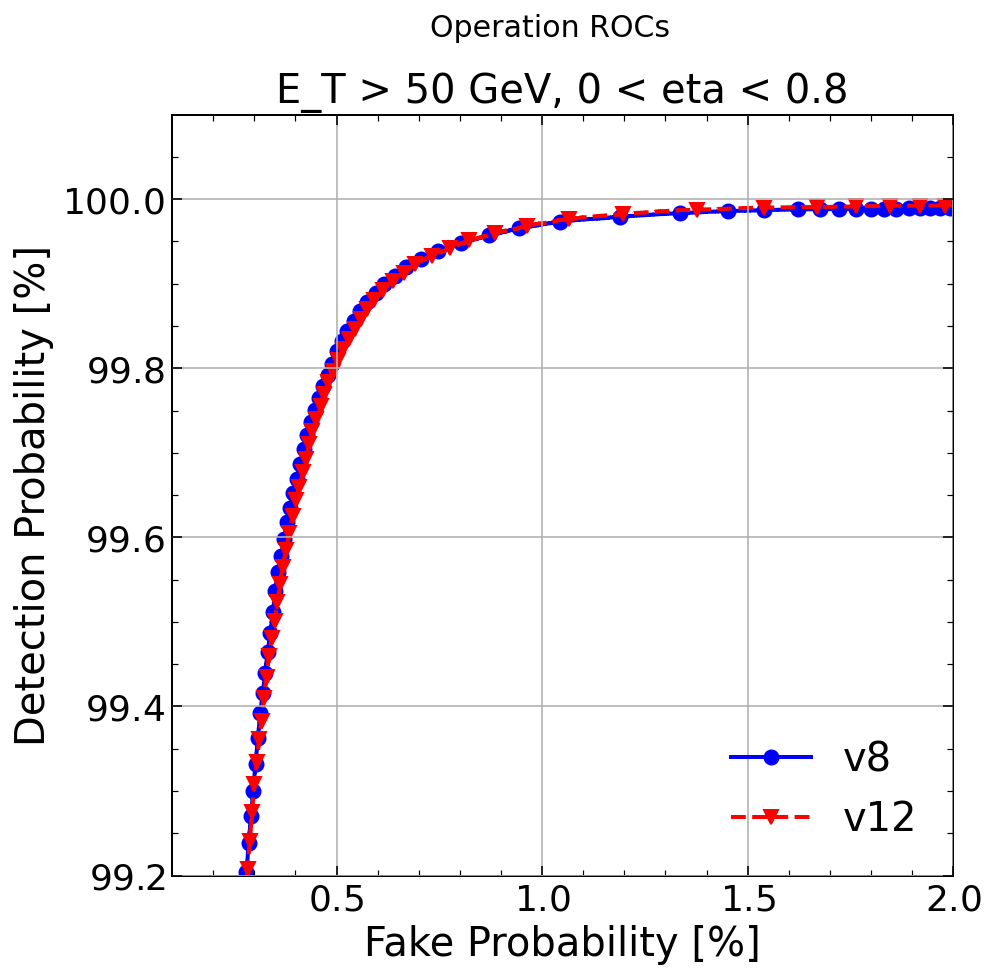

In [22]:
cv_v8.plot_roc_curves( best_sorts, ['v8','v12'], 
                        ['v8','v12'], 
                        'output/roc_v8_and_v12_et4_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',2),
                        et_bin=4, eta_bin=0, xmin=0.1, xmax=2, ymin=99.2, ymax=100.1, 
                        title='E_T > 50 GeV, 0 < eta < 0.8',
                        fontsize=20,lines=lines,markers=markers,
                        figsize=(7,7))

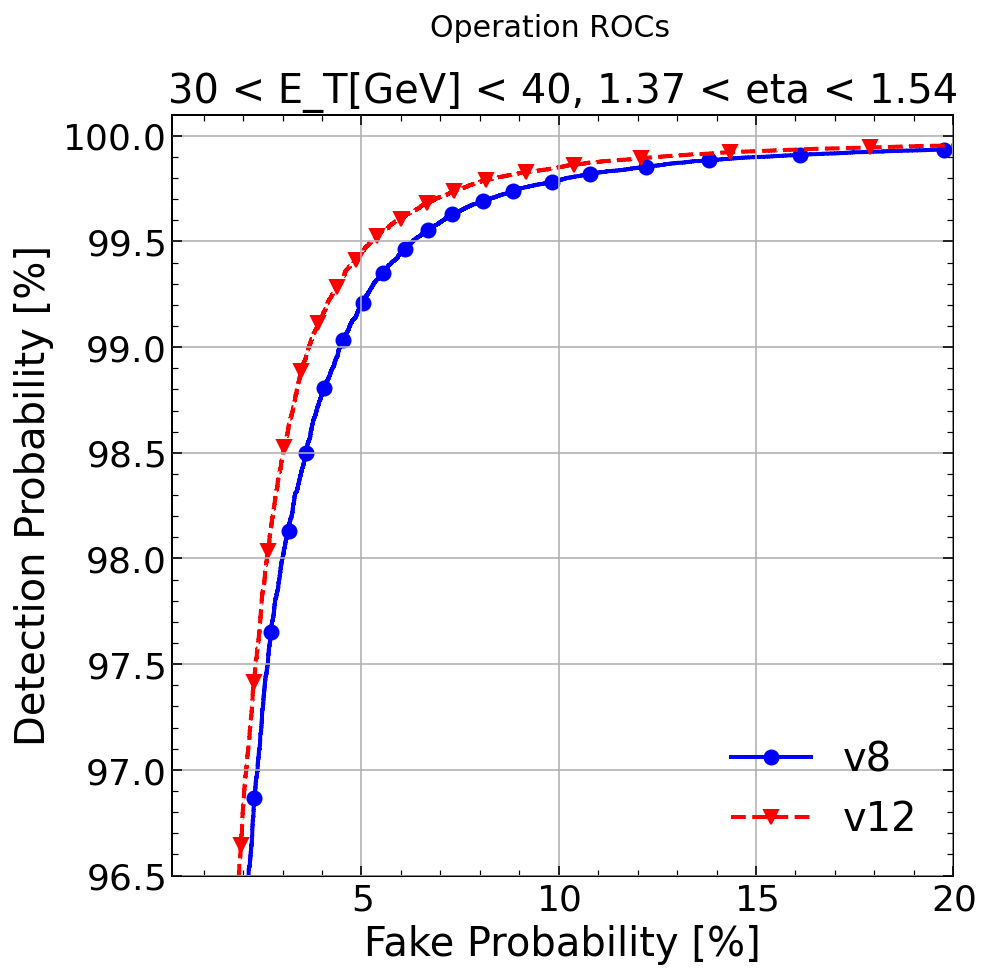

In [25]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v12'], 
                        ['v8','v12'], 
                        'output/roc_v8_and_v12_et2_eta2.pdf', display=True, 
                        colors=get_color_fader('blue','red',2),
                        et_bin=2, eta_bin=2, xmin=0.2, xmax=20, ymin=96.5, ymax=100.1, 
                        fontsize=20,
                        lines=lines,markers=markers,
                        title='30 < E_T[GeV] < 40, 1.37 < eta < 1.54',
                        figsize=(7,7))